In [1]:
import pandas as pd
import numpy as np
from sklearn import tree

In [2]:
df=pd.read_csv('User_Data.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [8]:
x=df.iloc[:, [2,3]].values  
y=df.iloc[:, 4].values  

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [9]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [10]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [11]:
y_pred = classifier.predict(x_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[63  5]
 [ 4 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        68
           1       0.85      0.88      0.86        32

    accuracy                           0.91       100
   macro avg       0.89      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100

Accuracy: 0.91


In [13]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [14]:
    #Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [15]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)

In [17]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)
cm

array([[62,  6],
       [ 3, 29]], dtype=int64)

[Text(166.32692307692307, 209.07692307692307, 'X[0] <= 0.631\nentropy = 0.951\nsamples = 300\nvalue = [189, 111]'),
 Text(87.99230769230769, 192.35076923076923, 'X[1] <= 0.606\nentropy = 0.693\nsamples = 215\nvalue = [175, 40]'),
 Text(38.63076923076923, 175.62461538461537, 'X[0] <= -0.161\nentropy = 0.241\nsamples = 176\nvalue = [169, 7]'),
 Text(30.046153846153846, 158.89846153846153, 'entropy = 0.0\nsamples = 114\nvalue = [114, 0]'),
 Text(47.215384615384615, 158.89846153846153, 'X[1] <= -0.06\nentropy = 0.509\nsamples = 62\nvalue = [55, 7]'),
 Text(38.63076923076923, 142.1723076923077, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(55.8, 142.1723076923077, 'X[1] <= 0.403\nentropy = 0.771\nsamples = 31\nvalue = [24, 7]'),
 Text(47.215384615384615, 125.44615384615385, 'X[1] <= 0.027\nentropy = 0.663\nsamples = 29\nvalue = [24, 5]'),
 Text(38.63076923076923, 108.72, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(55.8, 108.72, 'X[1] <= 0.259\nentropy = 0.592\nsamples = 28

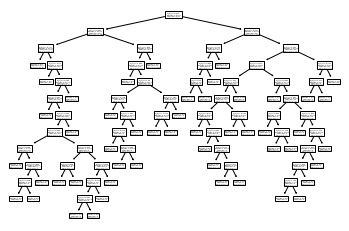

In [18]:
tree.plot_tree(classifier)

In [19]:
text_representation = tree.export_text(classifier)
print(text_representation)


|--- feature_0 <= 0.63
|   |--- feature_1 <= 0.61
|   |   |--- feature_0 <= -0.16
|   |   |   |--- class: 0
|   |   |--- feature_0 >  -0.16
|   |   |   |--- feature_1 <= -0.06
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  -0.06
|   |   |   |   |--- feature_1 <= 0.40
|   |   |   |   |   |--- feature_1 <= 0.03
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  0.03
|   |   |   |   |   |   |--- feature_1 <= 0.26
|   |   |   |   |   |   |   |--- feature_1 <= 0.08
|   |   |   |   |   |   |   |   |--- feature_0 <= 0.14
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_0 >  0.14
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 0.06
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 0.24
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  0.24
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   